In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [12]:
users = pd.read_csv('Data/Users.csv')

In [13]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [14]:
book = pd.read_csv('Data/Books.csv')
book.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [15]:
ratings = pd.read_csv('Data/Ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [16]:
ratings['Book-Rating'].value_counts() 

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [17]:
book['ISBN'].nunique()

271360

In [18]:
ratings['ISBN'].nunique()

340556

In [19]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [20]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [21]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [22]:
ratings['User-ID'].nunique()         

105283

In [23]:
book['Book-Title'].nunique()

242135

In [24]:
population_data = pd.merge(left=ratings,right=book,on='ISBN')
population_data.head()  

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [25]:
population_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   ISBN                 1031136 non-null  object
 2   Book-Rating          1031136 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031134 non-null  object
 5   Year-Of-Publication  1031136 non-null  object
 6   Publisher            1031134 non-null  object
 7   Image-URL-S          1031136 non-null  object
 8   Image-URL-M          1031136 non-null  object
 9   Image-URL-L          1031132 non-null  object
dtypes: int64(2), object(8)
memory usage: 78.7+ MB


In [26]:
population_data.shape[0] 

1031136

In [27]:
population_data['Book-Title'].nunique(),population_data['ISBN'].nunique()

(241071, 270151)

In [28]:
population_data.shape[0],   population_data['Book-Author'].nunique(),    population_data['Publisher'].nunique()

(1031136, 101587, 16729)

In [29]:
population_data2  =  population_data

In [30]:
population_data2  = pd.to_numeric(population_data2['Year-Of-Publication'],errors='coerce')         # first object to numerical
population_data2.isnull().sum()

4

In [31]:
population_data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [32]:
num_rating_df = population_data.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [33]:
print(population_data['Book-Rating'].dtype)
population_data['Book-Rating'] = pd.to_numeric(population_data['Book-Rating'], errors='coerce')
population_data = population_data.dropna(subset=['Book-Rating'])
avg_rating_df = population_data.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)
print(avg_rating_df)

int64
                                               Book-Title  avg_rating
0        A Light in the Storm: The Civil War Diary of ...    2.250000
1                                   Always Have Popsicles    0.000000
2                    Apple Magic (The Collector's series)    0.000000
3        Ask Lily (Young Women of Faith: Lily Series, ...    8.000000
4        Beyond IBM: Leadership Marketing and Finance ...    0.000000
...                                                   ...         ...
241066                                      Ã?Â?lpiraten.    0.000000
241067                     Ã?Â?rger mit Produkt X. Roman.    5.250000
241068                                Ã?Â?sterlich leben.    7.000000
241069                              Ã?Â?stlich der Berge.    2.666667
241070                                  Ã?Â?thique en toc    4.000000

[241071 rows x 2 columns]


In [34]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [35]:
popular_df.describe()

,num_ratings,avg_rating
count,241071.000000,241071.000000
mean,4.277312,2.890137
std,16.738685,3.268984
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.971429
75%,3.000000,5.000000
max,2502.000000,10.000000


<Axes: xlabel='num_ratings', ylabel='Density'>

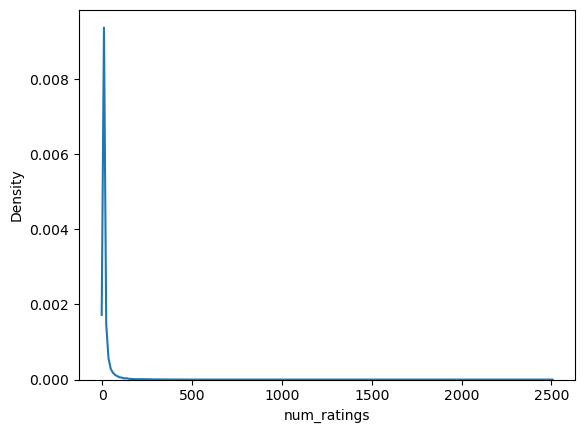

In [36]:
sns.kdeplot(popular_df['num_ratings'])

In [37]:
popular_df[popular_df['num_ratings']>=250]

,Book-Title,num_ratings,avg_rating
764,1984,284,4.454225
818,1st to Die: A Novel,509,3.575639
1048,2nd Chance,356,3.269663
1760,A Bend in the Road,346,3.364162
2281,"A Child Called \It\"": One Child's Courage to S...",265,4.086792
...,...,...,...
233850,White Oleander : A Novel,387,3.506460
233851,White Oleander : A Novel (Oprah's Book Club),356,3.772472
234740,Wicked: The Life and Times of the Wicked Witch...,326,3.766871
234951,Wild Animus,2502,1.019584


In [38]:
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False)
popular_df

,Book-Title,num_ratings,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
227701,Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283
233635,Whispers,286,2.199301
143377,Presumed Innocent,294,2.139456
94382,Isle of Dogs,288,2.000000


In [39]:
top_50_num_rating = popular_df.head(50)
top_50_num_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 80434 to 233851
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book-Title   50 non-null     object 
 1   num_ratings  50 non-null     int64  
 2   avg_rating   50 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ KB


In [40]:
best_books = popular_df.merge(book,on='Book-Title').drop_duplicates('Book-Title')
best_books.head()

,Book-Title,num_ratings,avg_rating,ISBN,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,0439139597,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,0590353403,J. K. Rowling,1998,Scholastic,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,043935806X,J. K. Rowling,2003,Scholastic,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,0439064872,J. K. Rowling,2000,Scholastic,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...,http://images.amazon.com/images/P/0439064872.0...


In [41]:
best_books['Book-Title'].duplicated().sum() 

0

In [42]:
final_data_for_popularity_based_recommandation = best_books[['Book-Title','num_ratings','avg_rating','Book-Author','Publisher','Image-URL-M']].head(80)
final_data_for_popularity_based_recommandation.head()

,Book-Title,num_ratings,avg_rating,Book-Author,Publisher,Image-URL-M
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439136350.0...
3,Harry Potter and the Goblet of Fire (Book 4),387,5.824289,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439139597.0...
5,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0590353403.0...
9,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/043935806X.0...
13,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453,J. K. Rowling,Scholastic,http://images.amazon.com/images/P/0439064872.0...


In [43]:
final_data_for_popularity_based_recommandation.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 0 to 284
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book-Title   80 non-null     object 
 1   num_ratings  80 non-null     int64  
 2   avg_rating   80 non-null     float64
 3   Book-Author  80 non-null     object 
 4   Publisher    80 non-null     object 
 5   Image-URL-M  80 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.4+ KB


In [44]:
final_data_for_popularity_based_recommandation.to_csv('popularity_based.csv',index=False)

In [45]:
population_data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [46]:
population_data.groupby('User-ID').count()['Book-Rating']>250

User-ID
2         False
8         False
9         False
10        False
12        False
          ...  
278846    False
278849    False
278851    False
278852    False
278854    False
Name: Book-Rating, Length: 92106, dtype: bool

In [47]:
x = population_data.groupby('User-ID').count()['Book-Rating']>250
continous_learner_id = x[x].index
continous_learner_id

Index([   254,   2276,   2766,   3363,   4385,   6251,   6543,   6575,   7158,
         7346,
       ...
       271705, 273979, 274004, 274061, 274301, 274308, 275970, 277427, 277639,
       278418],
      dtype='int64', name='User-ID', length=613)

In [48]:
full_detail_of_continous_learner = population_data[population_data['User-ID'].isin(continous_learner_id)]
full_detail_of_continous_learner.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1151,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
1152,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
1153,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
1154,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...


In [49]:
full_detail_of_continous_learner.shape

(429537, 10)

In [50]:
book_tile = full_detail_of_continous_learner.groupby('Book-Title').count()['Book-Rating']>=50
good_books = book_tile[book_tile].index
print(good_books.shape)
good_books

(574,)


Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Fine Balance',
       'A Heartbreaking Work of Staggering Genius',
       ...
       'Wild Animus', 'Winter Moon', 'Winter Solstice', 'Wish You Well',
       'Without Remorse', 'Wuthering Heights', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=574)

In [51]:
final_filterd_data = full_detail_of_continous_learner[full_detail_of_continous_learner['Book-Title'].isin(good_books)]
final_filterd_data.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1150,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1163,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1165,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1168,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1174,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...


In [52]:
final_filterd_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45093 entries, 1150 to 1029309
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User-ID              45093 non-null  int64 
 1   ISBN                 45093 non-null  object
 2   Book-Rating          45093 non-null  int64 
 3   Book-Title           45093 non-null  object
 4   Book-Author          45093 non-null  object
 5   Year-Of-Publication  45093 non-null  object
 6   Publisher            45093 non-null  object
 7   Image-URL-S          45093 non-null  object
 8   Image-URL-M          45093 non-null  object
 9   Image-URL-L          45093 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.8+ MB


In [53]:
final_filterd_data['Book-Title'].nunique()

574

In [54]:
pivot_table = final_filterd_data.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
pivot_table.head()

User-ID,254,2276,2766,3363,4385,6251,6543,6575,7158,7346,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Bend in the Road,0.0,NaN,7.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
pivot_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 1984 to \O\" Is for Outlaw"
Columns: 613 entries, 254 to 278418
dtypes: float64(613)
memory usage: 2.7+ MB


In [56]:
pivot_table.fillna(0 ,inplace = True)
pivot_table

User-ID,254,2276,2766,3363,4385,6251,6543,6575,7158,7346,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
unique_books_name = pivot_table.index
pd.Series(unique_books_name).to_csv('unique_book_name.csv',index=False)

In [58]:
pivot_table.to_csv('vector_table.csv',index=False)    

In [59]:
simlarity_score  = cosine_similarity(pivot_table)
simlarity_score

array([[1.        , 0.12637786, 0.01584756, ..., 0.1387288 , 0.08450515,
        0.0521102 ],
       [0.12637786, 1.        , 0.28824811, ..., 0.08010424, 0.18117097,
        0.1617243 ],
       [0.01584756, 0.28824811, 1.        , ..., 0.05165773, 0.05618509,
        0.12893887],
       ...,
       [0.1387288 , 0.08010424, 0.05165773, ..., 1.        , 0.07113412,
        0.02067643],
       [0.08450515, 0.18117097, 0.05618509, ..., 0.07113412, 1.        ,
        0.11219793],
       [0.0521102 , 0.1617243 , 0.12893887, ..., 0.02067643, 0.11219793,
        1.        ]])

In [60]:
simlarity_score.shape      

(574, 574)

In [61]:
simlarity_score[0].shape          

(574,)

In [62]:
simlarity_score[0][0:5] 

array([1.        , 0.12637786, 0.01584756, 0.        , 0.06583148])

In [63]:
sorted(list(enumerate(simlarity_score[0])))[0:5]

[(0, 0.9999999999999998),
 (1, 0.12637786224606284),
 (2, 0.015847561142978476),
 (3, 0.0),
 (4, 0.06583147624087993)]

In [64]:
sorted(list(enumerate(simlarity_score[0])),key = lambda x :x[1],reverse=True)[0:5]

[(0, 0.9999999999999998),
 (433, 0.31663755334122123),
 (514, 0.28195011538876225),
 (439, 0.2775401170783511),
 (67, 0.2731957063983398)]

In [65]:
unique_books_name

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Fine Balance',
       'A Heartbreaking Work of Staggering Genius',
       ...
       'Wild Animus', 'Winter Moon', 'Winter Solstice', 'Wish You Well',
       'Without Remorse', 'Wuthering Heights', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=574)

In [66]:
data_to_get_more_detail = population_data[population_data['Book-Title'].isin(unique_books_name)]
data_to_get_more_detail.head() 

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
6,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
7,276746,0425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...
9,276746,0553561618,0,Dark Paradise,TAMI HOAG,1994,Bantam,http://images.amazon.com/images/P/0553561618.0...,http://images.amazon.com/images/P/0553561618.0...,http://images.amazon.com/images/P/0553561618.0...
10,276746,055356451X,0,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...


In [67]:
def recommend(book_name):
    index = list(pivot_table.index==book_name).index(True)       
    similar_items = sorted(list(enumerate(simlarity_score[index])),key=lambda x:x[1],reverse=True)[1:9]    
    data = []
    for i in similar_items:
        item = []     
        temp_df = data_to_get_more_detail[data_to_get_more_detail['Book-Title'] == pivot_table.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))   
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))  
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))  
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Publisher'].values))  
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Rating'].values))
        
        data.append(item)     
    return data 

In [68]:
recomended_8_books_infrom  = recommend('1984')
print(f"this  is the 8 recommended books data which are most similar to this book '1984' and length of this data {len( recommend('1984'))} ")
recomended_8_books_infrom

this  is the 8 recommended books data which are most similar to this book '1984' and length of this data 8 


[["The Handmaid's Tale",
  'Margaret Atwood',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg',
  'Fawcett Books',
  0],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg',
  'Ballantine Books',
  0],
 ['The Hours : A Novel',
  'Michael Cunningham',
  'http://images.amazon.com/images/P/0374172897.01.MZZZZZZZ.jpg',
  'Farrar, Straus and Giroux',
  0],
 ['Brave New World',
  'Aldous Huxley',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg',
  'Harpercollins',
  8],
 ["The Bonesetter's Daughter",
  'Amy Tan',
  'http://images.amazon.com/images/P/0804114986.01.MZZZZZZZ.jpg',
  'Ballantine Books',
  0],
 ['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
  'J. R. R. Tolkien',
  'http://images.amazon.com/images/P/0618129030.01.MZZZZZZZ.jpg',
  'Houghton Mifflin Company',
  8],
 ['Fahrenheit 451',
  'RAY BRADBURY',
  'http://images.amazon.com/images/P/0345342968.01.MZ

In [69]:
recomended_8_books_infrom[5]        

['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
 'J. R. R. Tolkien',
 'http://images.amazon.com/images/P/0618129030.01.MZZZZZZZ.jpg',
 'Houghton Mifflin Company',
 8]

In [70]:
joblib.dump(data_to_get_more_detail,'collaborative_models/collaborative_recmdsystem_data.lb')        
joblib.load('collaborative_models/collaborative_recmdsystem_data.lb')             

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
6,276744,038550120X,7,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...
7,276746,0425115801,0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...,http://images.amazon.com/images/P/0425115801.0...
9,276746,0553561618,0,Dark Paradise,TAMI HOAG,1994,Bantam,http://images.amazon.com/images/P/0553561618.0...,http://images.amazon.com/images/P/0553561618.0...,http://images.amazon.com/images/P/0553561618.0...
10,276746,055356451X,0,Night Sins,TAMI HOAG,1995,Bantam,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...,http://images.amazon.com/images/P/055356451X.0...
...,...,...,...,...,...,...,...,...,...,...
1031122,276704,0440206529,0,Blessings,Belva Plain,1990,Dell,http://images.amazon.com/images/P/0440206529.0...,http://images.amazon.com/images/P/0440206529.0...,http://images.amazon.com/images/P/0440206529.0...
1031124,276704,0446353957,0,Mirror Image,Sandra Brown,1990,Warner Books,http://images.amazon.com/images/P/0446353957.0...,http://images.amazon.com/images/P/0446353957.0...,http://images.amazon.com/images/P/0446353957.0...
1031125,276704,0446605409,0,Plum Island,Nelson DeMille,1998,Warner Books,http://images.amazon.com/images/P/0446605409.0...,http://images.amazon.com/images/P/0446605409.0...,http://images.amazon.com/images/P/0446605409.0...
1031128,276704,0743211383,7,Dreamcatcher,Stephen King,2001,Scribner,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...,http://images.amazon.com/images/P/0743211383.0...


In [72]:
joblib.dump(pivot_table,'models/pivot_table_data.lb')   
joblib.load('models/pivot_table_data.lb')              

User-ID,254,2276,2766,3363,4385,6251,6543,6575,7158,7346,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
joblib.dump(simlarity_score,'models/similarity_score.lb')       
joblib.load('models/similarity_score.lb')              

array([[1.        , 0.12637786, 0.01584756, ..., 0.1387288 , 0.08450515,
        0.0521102 ],
       [0.12637786, 1.        , 0.28824811, ..., 0.08010424, 0.18117097,
        0.1617243 ],
       [0.01584756, 0.28824811, 1.        , ..., 0.05165773, 0.05618509,
        0.12893887],
       ...,
       [0.1387288 , 0.08010424, 0.05165773, ..., 1.        , 0.07113412,
        0.02067643],
       [0.08450515, 0.18117097, 0.05618509, ..., 0.07113412, 1.        ,
        0.11219793],
       [0.0521102 , 0.1617243 , 0.12893887, ..., 0.02067643, 0.11219793,
        1.        ]])